In [1]:
import matplotlib.pyplot as plt
import model.util as util
import seaborn as sns
import pandas as pd

In [7]:
data = util.get_data('CLN_HLT_CPT', os.path.join('..', 'data'))
display(data.sample(frac=1, random_state=42).head(10))
data.shape

,i_smx,i_sgv,i_sgn,i_rsg,i_rer,i_ren,i_qnt,i_gsv,i_fic,CPT,i_key
2505,1,0,0,0.000000,0.10,3,50,0.000043,1.0,9,0
73393,0,1,0,0.000000,0.50,10,75,0.000043,0.0,0,1
127026,0,0,1,0.000010,0.10,6,90,0.000157,1.0,9,2
100609,1,0,0,0.000010,0.30,10,90,0.000043,0.6,7,2
2996,1,0,0,0.000000,0.10,6,50,0.000000,0.1,0,0
74549,0,1,0,0.000010,0.75,5,75,0.000043,0.3,3,1
30886,0,1,0,0.000001,1.00,10,50,0.000157,1.0,9,0
46041,0,0,1,0.000010,1.00,8,50,0.000043,0.4,5,0
35038,0,0,1,0.000000,0.20,1,50,0.000157,0.3,4,0
72305,0,1,0,0.000100,0.50,3,75,0.000043,0.3,3,1


(139392, 11)

In [4]:
columns = [col for col in data.columns if '0.' not in col]
columns.pop()

display(pd.DataFrame({
    'column'            : list(columns),
    'unique values'     : [len(data[col].unique()) for col in columns],
    'total values'      : [len(data[col]) for col in columns],
    'unique / total'    : [len(data[col].unique()) / len(data[col]) for col in columns]
}))

,column,unique values,total values,unique / total
0,i_smx,2,139392,0.000014
1,i_sgv,2,139392,0.000014
2,i_sgn,2,139392,0.000014
3,i_rsg,4,139392,0.000029
4,i_rer,8,139392,0.000057
5,i_ren,11,139392,0.000079
6,i_qnt,3,139392,0.000022
7,i_gsv,4,139392,0.000029
8,i_fic,11,139392,0.000079


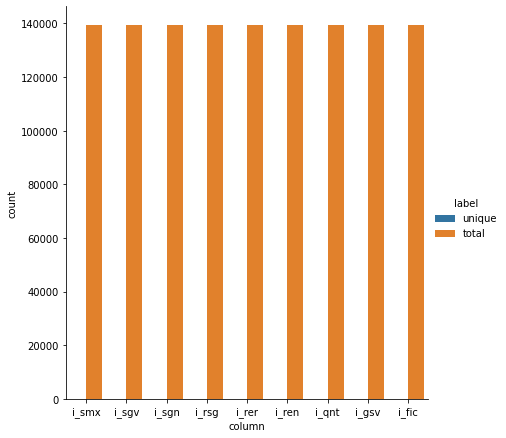

In [5]:
sns.catplot(hue='label'
    , x='column'
    , y='count'
    , kind='bar'
    , data=pd.DataFrame({
        'column': list(columns) + list(columns),
        'label' : (['unique'] * len(columns)) + (['total'] * len(columns)),
        'count' : [len(data[col].unique()) for col in columns] + [len(data[col]) for col in columns]
    })
    , height=6
);

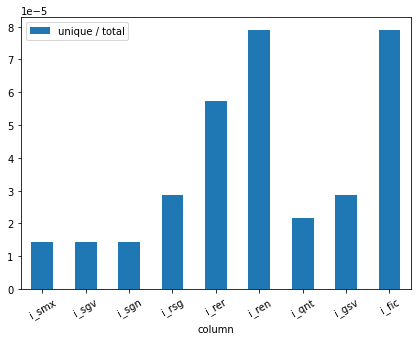

In [6]:
pd.DataFrame({
    'column'            : list(columns),
    'unique / total'    : [len(data[col].unique()) / len(data[col]) for col in columns]
}).plot(kind='bar', x='column', rot=30, figsize=(7, 5));